In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
import imageio
import pathlib
import matplotlib.image as img

In [3]:
## Read DataSet

In [ ]:
cell_images
|
|-Parasitized
|   |-c1.png
|   |-c2.png
|   |-......
|-Uninfected
    |-u1.png
    |-u2.png
    |-......

In [5]:
data_path = pathlib.Path('/kaggle/input/cell-images-for-detecting-malaria/cell_images') 

In [7]:
Parasitized = list(data_path.glob('Parasitized/*'))
Uninfected = list(data_path.glob('Uninfected/*'))

In [17]:
## create dic of data folers --> class names
data = {
    'Parasitized':Parasitized,
   'Uninfected':Uninfected
}

In [21]:
list(data.keys())

['Parasitized', 'Uninfected']

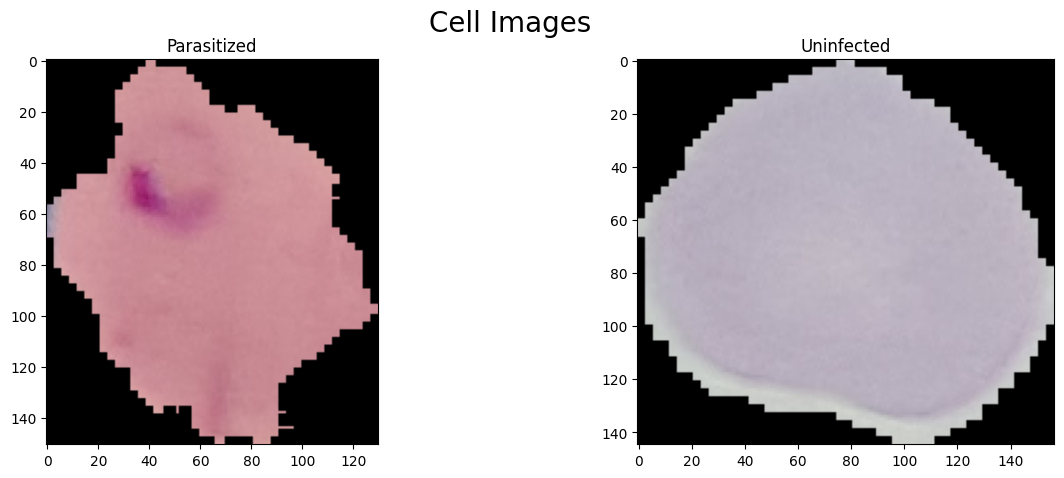

In [22]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
fig.suptitle('Cell Images', fontsize = 20)

Parasitized_img = img.imread(Parasitized[0])
Uninfected_img = img.imread(Uninfected[0])

for i , name in enumerate(list(data.keys())):
    ax[i].set_title(name)


ax[0].imshow(Parasitized_img)
ax[1].imshow(Uninfected_img)
plt.show()

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
dir_path = '/kaggle/input/cell-images-for-detecting-malaria/cell_images'

In [24]:
data_gen = ImageDataGenerator(rescale = 1/255.0,
                             validation_split = 0.2)

In [26]:
train_data= data_gen.flow_from_directory(dir_path,
                                        target_size = (128,128),
                                        batch_size=16,
                                        class_mode = 'binary',
                                        subset = 'training')

Found 44095 images belonging to 3 classes.


In [27]:
test_data=data_gen.flow_from_directory(dir_path,
                                        target_size = (128,128),
                                        batch_size=1,
                                        class_mode = 'binary',
                                        subset = 'validation')

Found 11021 images belonging to 3 classes.


In [28]:
##Model bulid

In [30]:
# create NN
model = Sequential()

#1- Input layer --> flatten layer with input shape of data
model.add(tf.keras.layers.Flatten())

#2- Hidden layers --> Dense layer + activation fun
model.add(tf.keras.layers.Dense(128,activation =tf.keras.activations.relu ))
model.add(tf.keras.layers.Dense(64,activation =tf.keras.activations.relu ))
model.add(tf.keras.layers.Dense(32,activation =tf.keras.activations.relu ))

#3- Output layer -->Dense layer + activation fun(per task)
model.add(tf.keras.layers.Dense(1,activation =tf.keras.activations.sigmoid))

In [31]:
model.compile(
    optimizer ='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [32]:
model_history =model.fit(train_data,
          epochs= 5, 
          validation_data = test_data)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2756/2756 ━━━━━━━━━━━━━━━━━━━━ 382s 137ms/step - accuracy: 0.2490 - loss: -1047554944.0000 - val_accuracy: 0.2500 - val_loss: -20140953600.0000
Epoch 2/5
2756/2756 ━━━━━━━━━━━━━━━━━━━━ 92s 33ms/step - accuracy: 0.2473 - loss: -50097840128.0000 - val_accuracy: 0.2500 - val_loss: -189322362880.0000
Epoch 3/5
2756/2756 ━━━━━━━━━━━━━━━━━━━━ 92s 33ms/step - accuracy: 0.2528 - loss: -291417587712.0000 - val_accuracy: 0.2500 - val_loss: -662366453760.0000
Epoch 4/5
2756/2756 ━━━━━━━━━━━━━━━━━━━━ 90s 32ms/step - accuracy: 0.2517 - loss: -893537943552.0000 - val_accuracy: 0.2500 - val_loss: -1639110934528.0000
Epoch 5/5
2756/2756 ━━━━━━━━━━━━━━━━━━━━ 88s 32ms/step - accuracy: 0.2489 - loss: -2056199340032.0000 - val_accuracy: 0.2500 - val_loss: -3344205086720.0000
